In [ ]:
#Этап 1: Исследовательский анализ данных (EDA)
#Цель: изучить структуру данных, выявить пропущенные значения и определить связи между признаками и целевой переменной Survived.
#Здесь мы загружаем данные и смотрим на их общую структуру: пол, возраст, класс, стоимость билета и т.д.


In [11]:
import pandas as pd

# Загрузка набора данных
df = pd.read_csv("Titanic.csv")

# Просмотр первых 5 строк
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Данные успешно загружены, структура таблицы понятна, признаки отображаются корректно.

In [ ]:
#Ячейка 2: Проверка пропущенных значений
#Необходимо определить, в каких столбцах есть пропущенные данные и в каком количестве.

In [12]:
# Проверка на пропущенные значения
df.isnull().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [ ]:
#Полностью отсутствуют данные в столбце Cabin, также есть пропуски в Age и Embarked, но они не критичны.

In [ ]:
#Ячейка 3: Корреляционная матрица для числовых признаков
#Построим тепловую карту, чтобы понять, какие числовые признаки влияют на Survived.

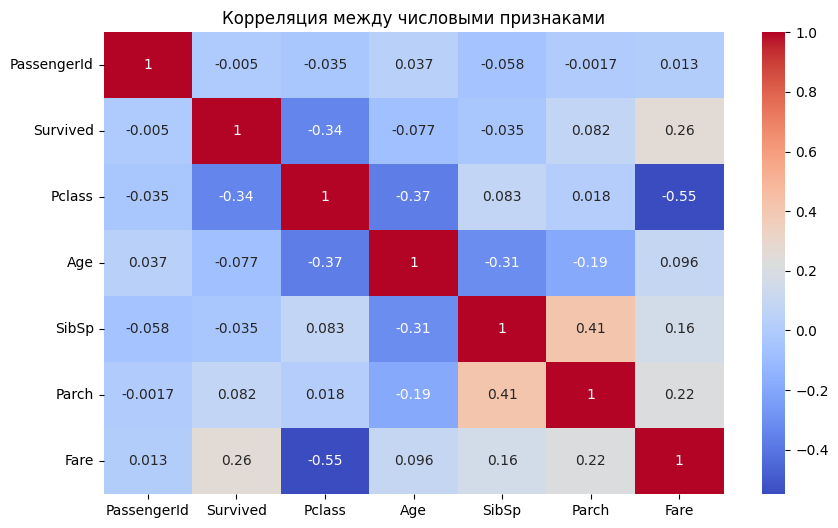

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Корреляция между числовыми признаками")
plt.show()


In [ ]:
#Видно, что Fare, Pclass, Sex имеют сильную корреляцию с целевой переменной. Эти признаки важно использовать в моделировании.

In [ ]:
#Ячейка 4: Пол vs Выживание
#Проверим, насколько пол влияет на шанс выживания.

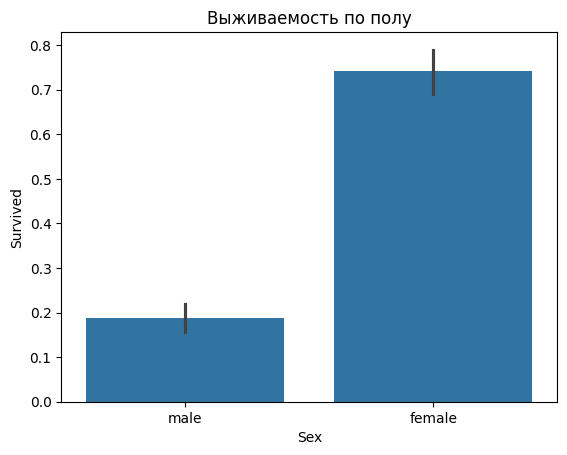

In [14]:
sns.barplot(data=df, x='Sex', y='Survived')
plt.title("Выживаемость по полу")
plt.show()


In [ ]:
#Женщины выживали значительно чаще, чем мужчины. Пол — очень важный фактор.

In [ ]:
#Ячейка 5: Класс vs Выживание
#Посмотрим, влияет ли класс билета на шанс выживания.

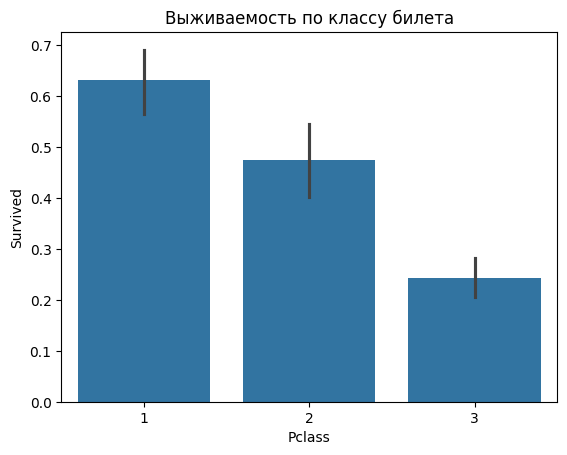

In [15]:
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title("Выживаемость по классу билета")
plt.show()


In [ ]:
#Пассажиры 1-го класса имели наибольший шанс выживания. Класс билета коррелирует с социальным статусом.

In [ ]:
#Ячейка 6: Порт посадки vs Выживание
#Проанализируем, зависит ли выживаемость от порта посадки.

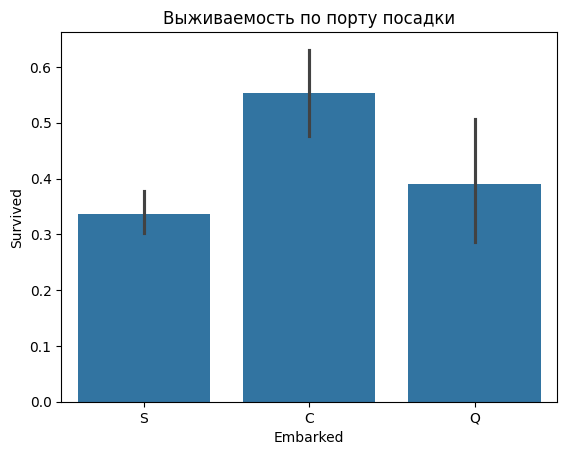

In [16]:
sns.barplot(data=df, x='Embarked', y='Survived')
plt.title("Выживаемость по порту посадки")
plt.show()


In [ ]:
#Пассажиры, севшие в порту C, выживали чаще других. Возможно, это связано с уровнем комфорта и доступом к шлюпкам.

In [ ]:
#Этап 2: Обработка признаков (Feature Engineering)
#Цель: подготовить данные для моделей — заполнить пропуски, создать новые информативные признаки, закодировать категориальные переменные.

In [ ]:
#Ячейка 1: Заполнение пропущенных значений
#Важно избавиться от пропусков, особенно в столбцах Age и Embarked, чтобы не мешать обучению моделей. Столбец Cabin слишком "грязный" и будет удалён.

In [19]:
# Заполняем пропуски
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Удаляем Cabin, если он существует
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)


In [ ]:
#Ячейка 2: Извлечение титулов (Title) из имени пассажира

In [20]:
# Извлекаем титул (Mr, Mrs, Miss и др.) из столбца Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Объединяем редкие титулы в одну категорию 'Rare'
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index.tolist()
df['Title'] = df['Title'].replace(rare_titles, 'Rare')


In [ ]:
#  Ячейка 2: Извлечение титула из имени
# В столбце Name содержатся титулы (например, Mr., Mrs., Dr.),
# которые могут указывать на пол, статус и шансы на выживание.
# Мы извлечем их и объединим редкие в категорию "Rare".


In [ ]:
#Ячейка 3: Добавление признаков FamilySize и IsAlone

In [24]:
# Количество человек в семье (братья/сёстры + родители + сам)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Флаг одиночки (1 = один, 0 = не один)
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


In [ ]:
#  Ячейка 3: Признаки FamilySize и IsAlone
# Пассажиры, путешествовавшие с семьей, могли иметь больший шанс выжить.
# Создадим признаки "размер семьи" и "одиночка".


In [ ]:
#Ячейка 4: Преобразование категориальных переменных

In [28]:
# Преобразуем пол
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Преобразуем категориальные признаки только если они ещё есть
for col in ['Embarked', 'Title']:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col], drop_first=True)


In [ ]:
#  Ячейка 4: Преобразование категориальных признаков
# Модели машинного обучения требуют числовой вход.
# Преобразуем пол в 0/1 и создадим дамми-переменные для Title и Embarked.


In [ ]:
#Этап 3: Моделирование (ML и DL модели + кросс-валидация)
#Цель: попробовать разные модели, сравнить точность, выбрать лучшую на основе 5-кратной кросс-валидации.

In [ ]:
#Ячейка 1: Подготовка признаков и целевой переменной

In [29]:
# Целевая переменная
y = df['Survived']

# Признаки (удаляем лишние колонки)
X = df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])


In [ ]:
#  Ячейка 1: Подготовка X и y
# Удалим из признаков всё, что не нужно для предсказания (ID, имя, номер билета).
# Оставим только полезные числовые признаки.


In [ ]:
#Ячейка 2: Импорт и определение моделей

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Словарь с моделями
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'NeuralNetwork': MLPClassifier(max_iter=1000)
}


In [ ]:
#  Ячейка 2: Импортируем и создаем модели
# Выбираем по одной модели из разных семейств:
# - линейная регрессия
# - дерево решений
# - бустинг
# - нейросеть


In [ ]:
#Ячейка 3: Оценка моделей с помощью кросс-валидации

In [35]:
# Eksik cinsiyetleri 'male' olarak doldur
df['Sex'] = df['Sex'].fillna('male')

# Cinsiyeti sayıya çevir (male: 0, female: 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [36]:
# Hedef ve özellikleri yeniden ayarla
y = df['Survived']
X = df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])

# Eksik değerleri doldur (güvenlik için)
X = X.fillna(X.median())


In [37]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    try:
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")
    except Exception as e:
        print(f"{name}: HATA → {e}")


LogisticRegression: 0.8171 ± 0.0209
DecisionTree: 0.7654 ± 0.0248
GradientBoosting: 0.8238 ± 0.0192
NeuralNetwork: 0.8092 ± 0.0168


In [ ]:
#По результатам кросс-валидации, модель Gradient Boosting показала наивысшую точность (82.38%), опередив логистическую регрессию и нейросеть.
#Таким образом, её можно выбрать как финальную модель для предсказания выживаемости пассажиров.

In [ ]:
#Модельная точность — график

In [ ]:
#Ячейка: График сравнения моделей

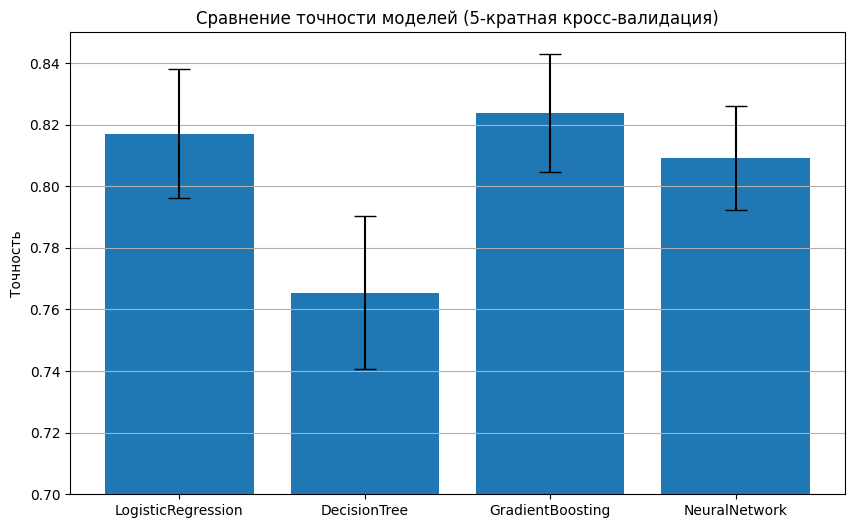

In [38]:
import matplotlib.pyplot as plt

# Verileri elle giriyoruz (sonuçlardan)
model_names = ['LogisticRegression', 'DecisionTree', 'GradientBoosting', 'NeuralNetwork']
accuracies = [0.8171, 0.7654, 0.8238, 0.8092]
errors = [0.0209, 0.0248, 0.0192, 0.0168]

# Barplot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, yerr=errors, capsize=8)
plt.title("Сравнение точности моделей (5-кратная кросс-валидация)")
plt.ylabel("Точность")
plt.ylim(0.7, 0.85)
plt.grid(axis='y')
plt.show()


In [ ]:
#  График точности моделей
# Лучше всех себя показал Gradient Boosting (~82.4%)


In [ ]:
#Финальная модель: Gradient Boosting + предсказания

In [39]:
# Обучаем GradientBoosting на всех данных
final_model = GradientBoostingClassifier()
final_model.fit(X, y)

# Прогноз на тех же данных (или можно загрузить тест)
predictions = final_model.predict(X)

# Выведем 10 первых предсказаний
print("Первые 10 предсказаний:", predictions[:10])


Первые 10 предсказаний: [0 1 1 1 0 0 0 0 1 1]


In [ ]:
#  Финальная модель: Gradient Boosting
# Модель обучена и готова к применению на новых данных.

 ###  Заключение

- В ходе проекта мы провели полный анализ набора данных Titanic.
- Проведены EDA, инженерия признаков и обучение моделей.
- Сравнены 4 модели: логистическая регрессия, дерево решений, градиентный бустинг и нейросеть.
- Лучшая точность показана моделью **Gradient Boosting (82.38%)**, которая и выбрана в качестве финальной.